<a href="https://colab.research.google.com/github/surendiran-20cl/Kaggle-April-Playground-Series/blob/main/Kaggle_2025_April_Playground_Series_Podcast_Listening_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:
Task is it to predict listening time of a podcast episode.

# Dataset Link:
https://www.kaggle.com/competitions/playground-series-s5e4/data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 1. Import Libraries

# Basic
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [3]:
# 2. Load the Data

# Mount Google Drive if needed
# from google.colab import drive
# drive.mount('/content/drive')

# Load datasets
train = pd.read_csv('/content/drive/MyDrive/Kaggle Competitions/April Playground Series - Podcast Listening Time Prediction/train.csv')  # <-- update the path if needed
test = pd.read_csv('/content/drive/MyDrive/Kaggle Competitions/April Playground Series - Podcast Listening Time Prediction/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Kaggle Competitions/April Playground Series - Podcast Listening Time Prediction/sample_submission.csv')

# Check the shapes
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

# Quick view of data
train.head()


Train shape: (750000, 12)
Test shape: (250000, 11)


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64
id                               int64
Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object


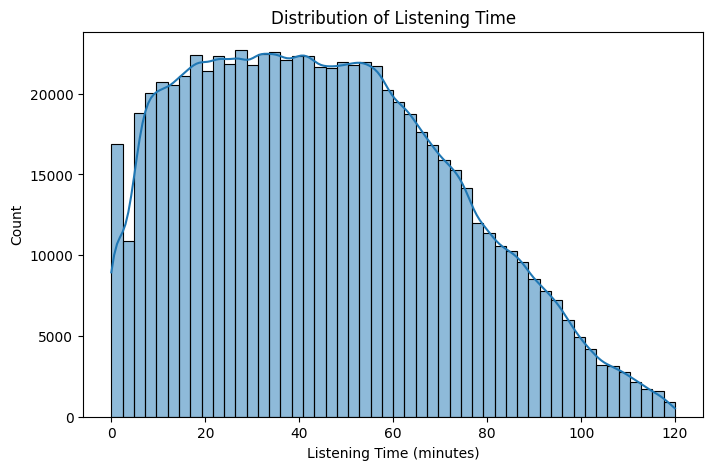

In [4]:
#  3. Basic Data Exploration

# Checking missing values
print(train.isnull().sum())

# Checking data types
print(train.dtypes)

# Checking target variable distribution
plt.figure(figsize=(8,5))
sns.histplot(train['Listening_Time_minutes'], bins=50, kde=True)
plt.title('Distribution of Listening Time')
plt.xlabel('Listening Time (minutes)')
plt.show()


In [4]:
#  4. Prepare Features and Target

# Drop 'id' column (not useful for modeling)
X = train.drop(['id', 'Listening_Time_minutes'], axis=1)
y = train['Listening_Time_minutes']

# Also prepare test data
X_test = test.drop(['id'], axis=1)


In [5]:
# Check which columns are object types (strings)
cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day',
       'Publication_Time', 'Episode_Sentiment'],
      dtype='object')


In [6]:
#Encode them
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to all categorical columns
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])
    X_test[col] = le.transform(X_test[col])  # Apply same transformation to test set


In [7]:
# Optional: Feature Scaling (can help RandomForest, but more important for other models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")

Train set size: (600000, 10)
Validation set size: (150000, 10)


In [ ]:
#  5. Build and Train a Basic Model (Random Forest)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on validation set
val_preds = model.predict(X_val)




In [12]:
# Calculate RMSE
# The squared parameter was added in scikit-learn version 0.22
# If you have an older version, use np.sqrt to get RMSE manually.
#val_rmse = mean_squared_error(y_val, val_preds, squared=False)
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds)) # Calculate RMSE manually
print(f"Validation RMSE: {val_rmse:.4f}")

Validation RMSE: 12.6630


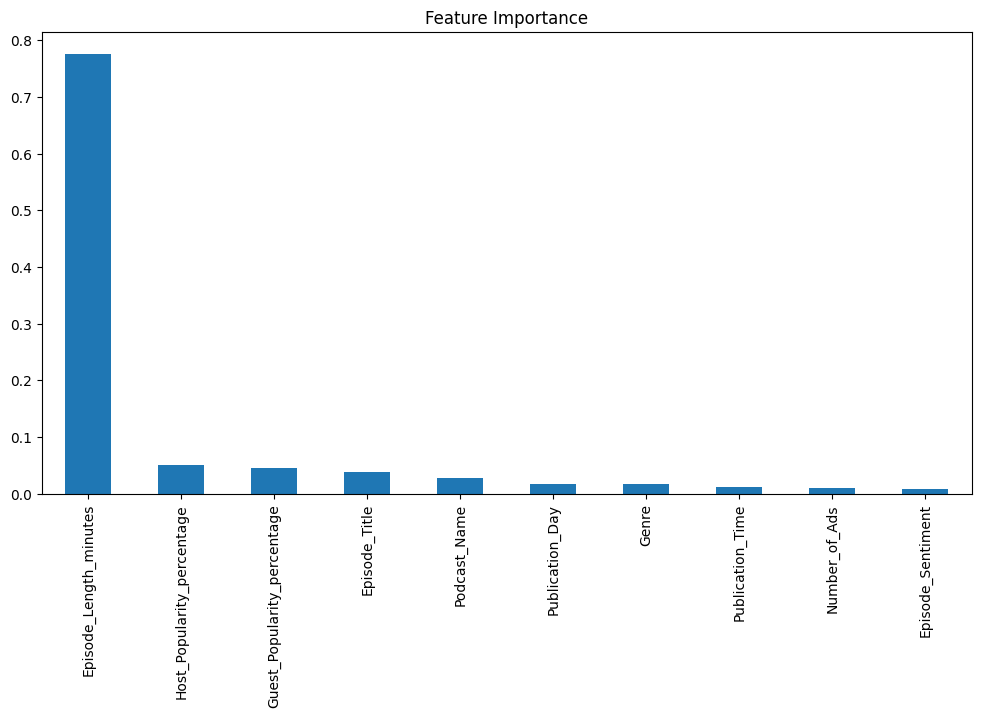

In [13]:
#  6. Feature Importance (Optional but helpful)

# Let's see which features are important
feature_importances = pd.Series(model.feature_importances_, index=train.drop(['id', 'Listening_Time_minutes'], axis=1).columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Feature Importance')
plt.show()


In [14]:
#  7. Make Predictions on Test Set and Submit

# Predict on test data
test_preds = model.predict(X_test_scaled)

# Prepare the submission file
submission = sample_submission.copy()
submission['Listening_Time_minutes'] = test_preds

# Save the file
submission.to_csv('submission.csv', index=False)

print("Submission file saved successfully!")


Submission file saved successfully!


In [9]:
# Import LightGBM

import lightgbm as lgb


In [20]:
#  LightGBM Model Training

# Set up the dataset for LightGBM
# Set free_raw_data=False to prevent the dataset from releasing its raw data
train_set = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
val_set = lgb.Dataset(X_val, label=y_val, free_raw_data=False)

# Set up basic parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Trees
    'learning_rate': 0.05,
    'num_leaves': 31,
    'random_state': 42
}
# Train the model
# Removed 'early_stopping_rounds' from lgb.train() and moved it to a callback function
lgbm_model = lgb.train(
    params,
    train_set,
    num_boost_round=1000,
    valid_sets=[train_set, val_set],
    callbacks=[lgb.early_stopping(stopping_rounds=50)], # Use early_stopping callback
    # verbose_eval=100 # This parameter is replaced with 'valid_sets' and the callback function
)

# Print evaluation results every 100 iterations
for i in range(0, 1000, 100):
    # eval_results = {}  # Store evaluation results # This is no longer needed.
    lgbm_model = lgb.train(
        params,
        train_set,
        num_boost_round=100, # train for 100 rounds in each iteration
        valid_sets=[train_set, val_set],
        callbacks=[lgb.early_stopping(stopping_rounds=50)],
        valid_names=['train', 'valid'],
        # evals_result=eval_results,  # Removed this line
        init_model=lgbm_model if i > 0 else None,  # Use the previous model as a starting point
    )
    print(f"Iteration {i + 100}:")
    # The following lines are modified to get the evaluation results from the model
    print(f"Train RMSE: {lgbm_model.best_score['train']['rmse']}")
    print(f"Valid RMSE: {lgbm_model.best_score['valid']['rmse']}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 12.6048	valid_1's rmse: 12.9667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until valida

In [21]:
#  Evaluate LightGBM Model on Validation Set

# Predict
val_preds_lgbm = lgbm_model.predict(X_val)

# Calculate RMSE

val_rmse_lgbm = np.sqrt(mean_squared_error(y_val, val_preds_lgbm)) # Calculate RMSE manually
print(f"LightGBM Validation RMSE: {val_rmse_lgbm:.4f}")


LightGBM Validation RMSE: 12.9668


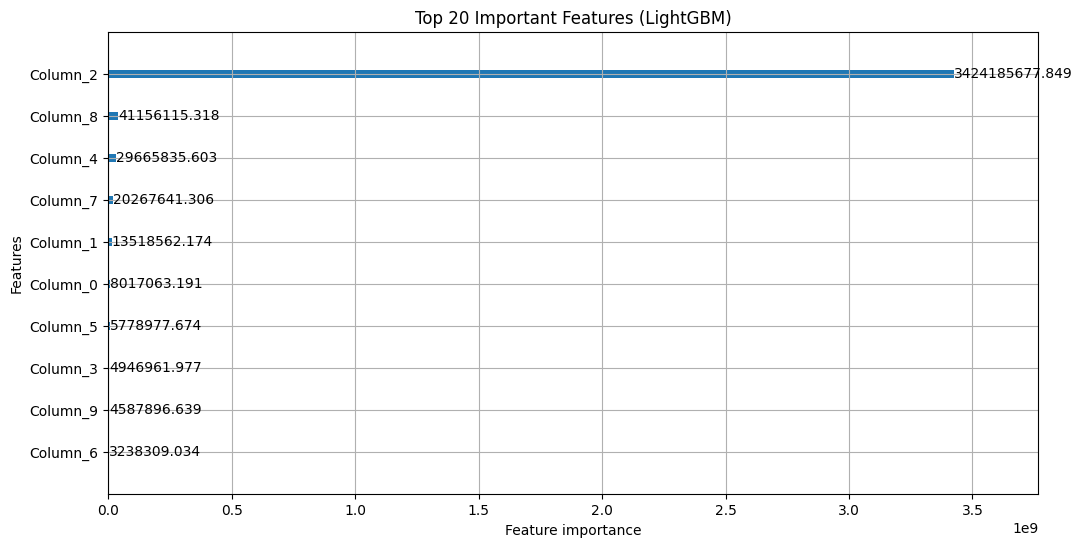

In [22]:
#  Plot Feature Importances

lgb.plot_importance(lgbm_model, max_num_features=20, importance_type='gain', figsize=(12,6))
plt.title("Top 20 Important Features (LightGBM)")
plt.show()


In [23]:
#  Make Predictions on Test Set

# Predict test set
test_preds_lgbm = lgbm_model.predict(X_test_scaled)

# Prepare submission file
submission_lgbm = sample_submission.copy()
submission_lgbm['Listening_Time_minutes'] = test_preds_lgbm

# Save submission
submission_lgbm.to_csv('submission_lgbm.csv', index=False)

print("LightGBM submission file created successfully.")


LightGBM submission file created successfully.


In [ ]:
# Let's Proceed to LightGBM Tuning (Beginner-Friendly)
# We’ll use Optuna — it is simple, automatic, and very powerful.

In [11]:
# Install optuna if not already installed
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 23.6 MB/s eta 0:00:00


In [12]:
# Import Optuna
import optuna


Define the Objective Function:

This function will try different parameter combinations, train LightGBM, and return the RMSE.

In [32]:
# Define objective function for Optuna
def objective(trial):
    # Define a set of hyperparameters to tune
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'random_state': 42
    }

    # Train LightGBM with these parameters
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val)

    model = lgb.train(
        params,
        lgb_train,
        valid_sets=[lgb_train, lgb_val],
        callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)],  # Log evaluation results every 100 iterations
        # verbose_eval=False  # Remove this line
    )

    # Predict validation set
    val_pred = model.predict(X_val)

    # Calculate RMSE
    # rmse = mean_squared_error(y_val, val_pred, squared=False) # Remove 'squared' parameter
    rmse = np.sqrt(mean_squared_error(y_val, val_pred)) # Calculate RMSE manually

    return rmse

trial.suggest_float and trial.suggest_int tell Optuna to try different values for each hyperparameter.

Goal = find the set that gives lowest RMSE on validation.

In [33]:
# Run Optuna Study
# Create study and optimize
study = optuna.create_study(direction="minimize")  # We want to minimize RMSE
study.optimize(objective, n_trials=30)  # Try 30 different sets (you can increase this number)

# Best parameters
print("Best Hyperparameters:", study.best_params)
print("Best RMSE:", study.best_value)


[I 2025-04-28 11:50:09,700] A new study created in memory with name: no-name-790e5ac2-d767-4bdf-b2e8-f439d5ceded5


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

[I 2025-04-28 11:50:14,644] Trial 0 finished with value: 13.02707380755647 and parameters: {'learning_rate': 0.21437595527651618, 'num_leaves': 115, 'max_depth': 5, 'min_child_samples': 90, 'subsample': 0.7872560973327729, 'colsample_bytree': 0.9351599583014394, 'reg_alpha': 4.577958664894791, 'reg_lambda': 1.283598152932216}. Best is trial 0 with value: 13.02707380755647.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-04-28 11:50:23,343] Trial 1 finished with value: 12.965954607623807 and parameters: {'learning_rate': 0.21009614020589215, 'num_leaves': 129, 'max_depth': 7, 'min_child_samples': 95, 'subsample': 0.5379205054311671, 'colsample_bytree': 0.966669862184876, 'reg_alpha': 0.884525005980093, 'reg_lambda': 4.571429545326124}. Best is trial 1 with value: 12.965954607623807.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

[I 2025-04-28 11:50:32,945] Trial 2 finished with value: 12.968049443963585 and parameters: {'learning_rate': 0.21791141556330565, 'num_leaves': 294, 'max_depth': 7, 'min_child_samples': 69, 'subsample': 0.5546731934457912, 'colsample_bytree': 0.9965252174428437, 'reg_alpha': 3.333980571617308, 'reg_lambda': 4.074732602866523}. Best is trial 1 with value: 12.965954607623807.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.164487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.9626	valid_1's rmse: 13.0329
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.9626	valid_1's rmse: 13.0329


[I 2025-04-28 11:50:50,115] Trial 3 finished with value: 13.03293699360645 and parameters: {'learning_rate': 0.14341167521908957, 'num_leaves': 34, 'max_depth': 11, 'min_child_samples': 89, 'subsample': 0.7551778934811704, 'colsample_bytree': 0.8881523567408356, 'reg_alpha': 4.852979567736541, 'reg_lambda': 3.4497256004811723}. Best is trial 1 with value: 12.965954607623807.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 14.1688	valid_1's rmse: 14.224
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 14.1688	valid_1's rmse: 14.224


[I 2025-04-28 11:51:02,390] Trial 4 finished with value: 14.223998185765819 and parameters: {'learning_rate': 0.018493656903882584, 'num_leaves': 267, 'max_depth': 11, 'min_child_samples': 36, 'subsample': 0.5016653142678283, 'colsample_bytree': 0.8190343481135595, 'reg_alpha': 3.225178635162788, 'reg_lambda': 0.09400878673079927}. Best is trial 1 with value: 12.965954607623807.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-04-28 11:51:05,783] Trial 5 finished with value: 13.13300055516255 and parameters: {'learning_rate': 0.1707730813474188, 'num_leaves': 294, 'max_depth': 3, 'min_child_samples': 49, 'subsample': 0.641193849916184, 'colsample_bytree': 0.6032289704974996, 'reg_alpha': 4.541509473231703, 'reg_lambda': 4.14251587243584}. Best is trial 1 with value: 12.965954607623807.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.6052	valid_1's rmse: 12.9537
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.6052	valid_1's rmse: 12.9537


[I 2025-04-28 11:51:15,609] Trial 6 finished with value: 12.95366065150256 and parameters: {'learning_rate': 0.08822537764822405, 'num_leaves': 229, 'max_depth': 15, 'min_child_samples': 54, 'subsample': 0.7891083418104303, 'colsample_bytree': 0.6550368775547768, 'reg_alpha': 1.5061919727124158, 'reg_lambda': 3.3902816088915078}. Best is trial 6 with value: 12.95366065150256.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.5937	valid_1's rmse: 12.9481
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.5937	valid_1's rmse: 12.9481


[I 2025-04-28 11:51:25,661] Trial 7 finished with value: 12.948083219180267 and parameters: {'learning_rate': 0.08715643860990809, 'num_leaves': 208, 'max_depth': 15, 'min_child_samples': 94, 'subsample': 0.8806567582606342, 'colsample_bytree': 0.8656581267168588, 'reg_alpha': 3.2264860225806977, 'reg_lambda': 2.760784484252839}. Best is trial 7 with value: 12.948083219180267.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-04-28 11:51:29,211] Trial 8 finished with value: 13.141200232375356 and parameters: {'learning_rate': 0.11759024539111956, 'num_leaves': 215, 'max_depth': 3, 'min_child_samples': 9, 'subsample': 0.6671844079211006, 'colsample_bytree': 0.5533648000393236, 'reg_alpha': 2.1055799036990805, 'reg_lambda': 0.7989255410492119}. Best is trial 7 with value: 12.948083219180267.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	training's rmse: 12.9326	valid_1's rmse: 13.0175
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.9326	valid_1's rmse: 13.0175


[I 2025-04-28 11:51:40,450] Trial 9 finished with value: 13.017477345802162 and parameters: {'learning_rate': 0.06633152769712607, 'num_leaves': 158, 'max_depth': 8, 'min_child_samples': 88, 'subsample': 0.5205207719120266, 'colsample_bytree': 0.7823376101350152, 'reg_alpha': 4.437807286397622, 'reg_lambda': 2.790688788231569}. Best is trial 7 with value: 12.948083219180267.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 14.0386	valid_1's rmse: 14.1055
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 14.0386	valid_1's rmse: 14.1055


[I 2025-04-28 11:51:49,140] Trial 10 finished with value: 14.105533849606196 and parameters: {'learning_rate': 0.02266451515921844, 'num_leaves': 204, 'max_depth': 15, 'min_child_samples': 71, 'subsample': 0.985516890278057, 'colsample_bytree': 0.6923034816803171, 'reg_alpha': 0.2689920737554683, 'reg_lambda': 1.7568354455427155}. Best is trial 7 with value: 12.948083219180267.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.120866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.0171	valid_1's rmse: 12.9775
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.0171	valid_1's rmse: 12.9775


[I 2025-04-28 11:51:55,733] Trial 11 finished with value: 12.977523810977955 and parameters: {'learning_rate': 0.28831896220011766, 'num_leaves': 225, 'max_depth': 15, 'min_child_samples': 23, 'subsample': 0.9002701207510512, 'colsample_bytree': 0.6807157103559268, 'reg_alpha': 1.608296048234195, 'reg_lambda': 2.605729581688783}. Best is trial 7 with value: 12.948083219180267.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.6995	valid_1's rmse: 12.9635
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.6995	valid_1's rmse: 12.9635


[I 2025-04-28 11:52:05,593] Trial 12 finished with value: 12.963451052158415 and parameters: {'learning_rate': 0.08382535114492842, 'num_leaves': 177, 'max_depth': 13, 'min_child_samples': 67, 'subsample': 0.8531680502830542, 'colsample_bytree': 0.8476735028273299, 'reg_alpha': 3.106482962959615, 'reg_lambda': 3.3342076288236604}. Best is trial 7 with value: 12.948083219180267.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.6082	valid_1's rmse: 12.9527
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.6082	valid_1's rmse: 12.9527


[I 2025-04-28 11:52:13,508] Trial 13 finished with value: 12.952655266706603 and parameters: {'learning_rate': 0.08510315890150816, 'num_leaves': 245, 'max_depth': 13, 'min_child_samples': 50, 'subsample': 0.8657919295413422, 'colsample_bytree': 0.7161627521455631, 'reg_alpha': 1.373604712318584, 'reg_lambda': 2.016127846443134}. Best is trial 7 with value: 12.948083219180267.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.8052	valid_1's rmse: 13.0086
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.8052	valid_1's rmse: 13.0086


[I 2025-04-28 11:52:24,192] Trial 14 finished with value: 13.00858335839099 and parameters: {'learning_rate': 0.05301804443935542, 'num_leaves': 249, 'max_depth': 12, 'min_child_samples': 45, 'subsample': 0.9212524592646255, 'colsample_bytree': 0.7370837323799546, 'reg_alpha': 2.4805319707772395, 'reg_lambda': 1.969755934860411}. Best is trial 7 with value: 12.948083219180267.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.5688	valid_1's rmse: 12.9565
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.5688	valid_1's rmse: 12.9565


[I 2025-04-28 11:52:33,067] Trial 15 finished with value: 12.956535286585515 and parameters: {'learning_rate': 0.12464589472075162, 'num_leaves': 170, 'max_depth': 13, 'min_child_samples': 32, 'subsample': 0.855693159510876, 'colsample_bytree': 0.7594102347942421, 'reg_alpha': 3.8604860691801552, 'reg_lambda': 1.8697800572434415}. Best is trial 7 with value: 12.948083219180267.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.7343	valid_1's rmse: 12.9803
Did not meet early stopping. Best iteration is:
[97]	training's rmse: 12.7431	valid_1's rmse: 12.9799


[I 2025-04-28 11:52:38,473] Trial 16 finished with value: 12.979906816141556 and parameters: {'learning_rate': 0.16779753216111082, 'num_leaves': 84, 'max_depth': 10, 'min_child_samples': 58, 'subsample': 0.9727827669982277, 'colsample_bytree': 0.8886305621578936, 'reg_alpha': 0.8760564041925717, 'reg_lambda': 2.352471134839284}. Best is trial 7 with value: 12.948083219180267.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.4689	valid_1's rmse: 12.9279
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.4689	valid_1's rmse: 12.9279


[I 2025-04-28 11:52:48,912] Trial 17 finished with value: 12.92786041274109 and parameters: {'learning_rate': 0.1048010636832974, 'num_leaves': 262, 'max_depth': 13, 'min_child_samples': 74, 'subsample': 0.8450851770604612, 'colsample_bytree': 0.8214361344960373, 'reg_alpha': 2.1518061083153164, 'reg_lambda': 1.0629064751290507}. Best is trial 17 with value: 12.92786041274109.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.5775	valid_1's rmse: 12.9443
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.5775	valid_1's rmse: 12.9443


[I 2025-04-28 11:52:58,048] Trial 18 finished with value: 12.944329274320877 and parameters: {'learning_rate': 0.11340767720843348, 'num_leaves': 189, 'max_depth': 14, 'min_child_samples': 81, 'subsample': 0.7114754596011948, 'colsample_bytree': 0.8182448884501468, 'reg_alpha': 2.482830120710072, 'reg_lambda': 0.6407104072985551}. Best is trial 17 with value: 12.92786041274109.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

[I 2025-04-28 11:53:06,665] Trial 19 finished with value: 12.946887780455787 and parameters: {'learning_rate': 0.12506343602264877, 'num_leaves': 273, 'max_depth': 9, 'min_child_samples': 80, 'subsample': 0.6829751083670099, 'colsample_bytree': 0.7981552363682207, 'reg_alpha': 2.2240073002793745, 'reg_lambda': 0.16273443726954884}. Best is trial 17 with value: 12.92786041274109.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.0979	valid_1's rmse: 12.9675
Did not meet early stopping. Best iteration is:
[94]	training's rmse: 12.1417	valid_1's rmse: 12.9655


[I 2025-04-28 11:53:14,280] Trial 20 finished with value: 12.965495542824135 and parameters: {'learning_rate': 0.29639196893004943, 'num_leaves': 186, 'max_depth': 13, 'min_child_samples': 80, 'subsample': 0.7291689597305598, 'colsample_bytree': 0.9212151092439267, 'reg_alpha': 1.9293258641481565, 'reg_lambda': 0.8270725154252812}. Best is trial 17 with value: 12.92786041274109.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

[I 2025-04-28 11:53:23,475] Trial 21 finished with value: 12.951146212758406 and parameters: {'learning_rate': 0.12428135793626242, 'num_leaves': 264, 'max_depth': 9, 'min_child_samples': 79, 'subsample': 0.6876377235201808, 'colsample_bytree': 0.8108339461170649, 'reg_alpha': 2.4787809719787415, 'reg_lambda': 0.04254717372774086}. Best is trial 17 with value: 12.92786041274109.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.117558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	training's rmse: 12.3783	valid_1's rmse: 12.9241
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.3783	valid_1's rm

[I 2025-04-28 11:53:32,137] Trial 22 finished with value: 12.924112621396445 and parameters: {'learning_rate': 0.1498853339640888, 'num_leaves': 274, 'max_depth': 11, 'min_child_samples': 79, 'subsample': 0.6141599476181621, 'colsample_bytree': 0.7924060583088387, 'reg_alpha': 2.869443903911091, 'reg_lambda': 0.5898069529139096}. Best is trial 22 with value: 12.924112621396445.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.5357	valid_1's rmse: 12.9543
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.5357	valid_1's rmse: 12.9543


[I 2025-04-28 11:53:40,265] Trial 23 finished with value: 12.95431477518963 and parameters: {'learning_rate': 0.18622690144682144, 'num_leaves': 143, 'max_depth': 11, 'min_child_samples': 64, 'subsample': 0.6193263563148282, 'colsample_bytree': 0.8323556107981331, 'reg_alpha': 2.9483212385050965, 'reg_lambda': 0.7308382517406786}. Best is trial 22 with value: 12.924112621396445.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.2295	valid_1's rmse: 12.9158
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.2295	valid_1's rmse: 12.9158


[I 2025-04-28 11:53:47,857] Trial 24 finished with value: 12.915784945588186 and parameters: {'learning_rate': 0.14306449891181977, 'num_leaves': 299, 'max_depth': 14, 'min_child_samples': 75, 'subsample': 0.5890030704459424, 'colsample_bytree': 0.7623991136429377, 'reg_alpha': 3.5389895622726906, 'reg_lambda': 1.2284014919350503}. Best is trial 24 with value: 12.915784945588186.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	training's rmse: 12.2596	valid_1's rmse: 12.9125
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.2596	valid_1's rmse: 12.9125


[I 2025-04-28 11:53:58,005] Trial 25 finished with value: 12.912480089215464 and parameters: {'learning_rate': 0.1509484637002944, 'num_leaves': 300, 'max_depth': 12, 'min_child_samples': 74, 'subsample': 0.5911224084099078, 'colsample_bytree': 0.7591494232695849, 'reg_alpha': 3.801267816222229, 'reg_lambda': 1.362919245130364}. Best is trial 25 with value: 12.912480089215464.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	training's rmse: 12.1657	valid_1's rmse: 12.9662
Did not meet early stopping. Best iteration is:
[99]	training's rmse: 12.174	valid_1's rmse: 12.9652


[I 2025-04-28 11:54:07,436] Trial 26 finished with value: 12.965234461062684 and parameters: {'learning_rate': 0.2430154287581669, 'num_leaves': 300, 'max_depth': 12, 'min_child_samples': 100, 'subsample': 0.5875456922862005, 'colsample_bytree': 0.6277415489463432, 'reg_alpha': 3.901026096816386, 'reg_lambda': 1.4249555553440227}. Best is trial 25 with value: 12.912480089215464.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

[I 2025-04-28 11:54:16,400] Trial 27 finished with value: 12.931599660431836 and parameters: {'learning_rate': 0.14589422823106712, 'num_leaves': 279, 'max_depth': 10, 'min_child_samples': 62, 'subsample': 0.5849612244173488, 'colsample_bytree': 0.7555008721486429, 'reg_alpha': 3.860964592608119, 'reg_lambda': 1.4748737617910443}. Best is trial 25 with value: 12.912480089215464.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.121923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.3024	valid_1's rmse: 12.9339
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.3024	valid_1's rmse: 12.9339


[I 2025-04-28 11:54:23,946] Trial 28 finished with value: 12.933881088255548 and parameters: {'learning_rate': 0.19401074213555153, 'num_leaves': 243, 'max_depth': 12, 'min_child_samples': 72, 'subsample': 0.5955474887488242, 'colsample_bytree': 0.7053456909242143, 'reg_alpha': 3.5764658900555792, 'reg_lambda': 1.1251631901277803}. Best is trial 25 with value: 12.912480089215464.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 12.7863	valid_1's rmse: 12.9922
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 12.7863	valid_1's rmse: 12.9922


[I 2025-04-28 11:54:30,986] Trial 29 finished with value: 12.99217452818162 and parameters: {'learning_rate': 0.15541890586576904, 'num_leaves': 79, 'max_depth': 14, 'min_child_samples': 85, 'subsample': 0.6361280724372018, 'colsample_bytree': 0.7787021622656661, 'reg_alpha': 4.225566127527665, 'reg_lambda': 0.44523343047254826}. Best is trial 25 with value: 12.912480089215464.


Best Hyperparameters: {'learning_rate': 0.1509484637002944, 'num_leaves': 300, 'max_depth': 12, 'min_child_samples': 74, 'subsample': 0.5911224084099078, 'colsample_bytree': 0.7591494232695849, 'reg_alpha': 3.801267816222229, 'reg_lambda': 1.362919245130364}
Best RMSE: 12.912480089215464


In [37]:
# Train LightGBM Again with Best Hyperparameters
# Train final LightGBM with best hyperparameters

best_params = study.best_params
best_params['objective'] = 'regression'
best_params['metric'] = 'rmse'
best_params['boosting_type'] = 'gbdt'
best_params['random_state'] = 42

# Retrain model
final_lgbm_model = lgb.train(
    best_params,
    lgb.Dataset(X_train, label=y_train),
    valid_sets=[lgb.Dataset(X_train), lgb.Dataset(X_val)],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)], # Use early_stopping and log_evaluation callbacks
    # verbose_eval=100  # Remove or comment out this line
)



# Evaluate
val_preds_final = final_lgbm_model.predict(X_val)
# final_rmse = mean_squared_error(y_val, val_preds_final, squared=False) # This line caused the error
final_rmse = np.sqrt(mean_squared_error(y_val, val_preds_final)) # Calculate RMSE manually
print(f"Final Tuned LightGBM Validation RMSE: {final_rmse:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's rmse: 45.5878	valid_1's rmse: 45.5824
Final Tuned LightGBM Validation RMSE: 24.0586


Model             | Validation RMSE

Random Forest     | 12.6630

LightGBM (default params) | 12.9668

LightGBM (Optuna tuned) | 24.0586

Why did this happen?

Because Optuna selected bad hyperparameters in the search space.

We only ran 30 trials, which is very low for a wide search space.

Also, it started overfitting or underfitting because the learning rate and number of leaves might have been set poorly.

In simple words: The tuning was too random and shallow.

New Plan: "Smart LightGBM Tuning"

-  Fix some important parameters
-  Tune only a few critical ones
-  Get RMSE lower than Random Forest

In [16]:
# Step 1: Define a better fixed LightGBM parameter base

fixed_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,  # safer
    'random_state': 42,
    'verbose': -1
}

# Step 2: Define objective function tuning only important parameters
def objective_important(trial):
    params = {
        **fixed_params,
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)
    }

    model = lgb.train(
        params,
        lgb.Dataset(X_train, label=y_train),
        valid_sets=[lgb.Dataset(X_train), lgb.Dataset(X_val)],
        # early_stopping_rounds=50, # Removed this line
        callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)], # Added this line and log_evaluation for controlling logging frequency
        # verbose_eval=False # Remove verbose_eval
    )

    preds = model.predict(X_val)
    # rmse = mean_squared_error(y_val, preds, squared=False) # This line caused the error. Removing 'squared=False' to be compatible with older scikit-learn versions.
    rmse = np.sqrt(mean_squared_error(y_val, preds)) # Calculate RMSE manually if 'squared=False' is not supported.
    return rmse

# Step 3: Run Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective_important, n_trials=40)  # try 40 better trials

print("Best Parameters:", study.best_params)
print("Best RMSE:", study.best_value)

[I 2025-04-28 12:44:31,389] A new study created in memory with name: no-name-4c4f9ac2-5abb-462e-91a6-69155b58a0b0


Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:44:40,187] Trial 0 finished with value: 26.099357152790404 and parameters: {'num_leaves': 62, 'max_depth': 8, 'min_child_samples': 54, 'subsample': 0.8077652580841039, 'colsample_bytree': 0.9890695021353304}. Best is trial 0 with value: 26.099357152790404.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:44:44,874] Trial 1 finished with value: 26.10426819984926 and parameters: {'num_leaves': 32, 'max_depth': 9, 'min_child_samples': 33, 'subsample': 0.8248067760925282, 'colsample_bytree': 0.6661900023246968}. Best is trial 0 with value: 26.099357152790404.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:44:51,565] Trial 2 finished with value: 26.107108652216414 and parameters: {'num_leaves': 24, 'max_depth': 10, 'min_child_samples': 34, 'subsample': 0.6816197875928591, 'colsample_bytree': 0.7039017435235453}. Best is trial 0 with value: 26.099357152790404.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4631	valid_1's rmse: 45.4612
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:44:57,155] Trial 3 finished with value: 26.1001103718805 and parameters: {'num_leaves': 53, 'max_depth': 13, 'min_child_samples': 63, 'subsample': 0.8317465988201993, 'colsample_bytree': 0.9950075698904329}. Best is trial 0 with value: 26.099357152790404.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:45:04,158] Trial 4 finished with value: 26.105262458448347 and parameters: {'num_leaves': 29, 'max_depth': 11, 'min_child_samples': 54, 'subsample': 0.6829444522925088, 'colsample_bytree': 0.8240264781544473}. Best is trial 0 with value: 26.099357152790404.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4631	valid_1's rmse: 45.4612
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:45:08,871] Trial 5 finished with value: 27.092727109794083 and parameters: {'num_leaves': 41, 'max_depth': 14, 'min_child_samples': 39, 'subsample': 0.9556275337987586, 'colsample_bytree': 0.6211693767424267}. Best is trial 0 with value: 26.099357152790404.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4483	valid_1's rmse: 45.4483
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:45:14,159] Trial 6 finished with value: 26.10011629463037 and parameters: {'num_leaves': 71, 'max_depth': 6, 'min_child_samples': 41, 'subsample': 0.695875979461027, 'colsample_bytree': 0.682495725766483}. Best is trial 0 with value: 26.099357152790404.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4611
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:45:20,729] Trial 7 finished with value: 26.105914672976652 and parameters: {'num_leaves': 27, 'max_depth': 8, 'min_child_samples': 74, 'subsample': 0.6963833776589817, 'colsample_bytree': 0.8928984286474364}. Best is trial 0 with value: 26.099357152790404.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4631	valid_1's rmse: 45.4612
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:45:25,424] Trial 8 finished with value: 26.10364055396037 and parameters: {'num_leaves': 34, 'max_depth': 14, 'min_child_samples': 37, 'subsample': 0.8146175465875877, 'colsample_bytree': 0.7208894303309679}. Best is trial 0 with value: 26.099357152790404.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:45:32,015] Trial 9 finished with value: 26.105133197009245 and parameters: {'num_leaves': 85, 'max_depth': 5, 'min_child_samples': 98, 'subsample': 0.7796436083866057, 'colsample_bytree': 0.7392273402260466}. Best is trial 0 with value: 26.099357152790404.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4631	valid_1's rmse: 45.4612
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:45:38,225] Trial 10 finished with value: 26.097806280050598 and parameters: {'num_leaves': 99, 'max_depth': 7, 'min_child_samples': 18, 'subsample': 0.9372387295558767, 'colsample_bytree': 0.9781594543175063}. Best is trial 10 with value: 26.097806280050598.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:45:46,536] Trial 11 finished with value: 26.09786697832981 and parameters: {'num_leaves': 96, 'max_depth': 7, 'min_child_samples': 14, 'subsample': 0.9829621198373429, 'colsample_bytree': 0.9963027519636434}. Best is trial 10 with value: 26.097806280050598.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:45:52,714] Trial 12 finished with value: 26.097805908710907 and parameters: {'num_leaves': 100, 'max_depth': 7, 'min_child_samples': 11, 'subsample': 0.9946331305905104, 'colsample_bytree': 0.9118375218012934}. Best is trial 12 with value: 26.097805908710907.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:45:59,827] Trial 13 finished with value: 26.105133197009245 and parameters: {'num_leaves': 100, 'max_depth': 5, 'min_child_samples': 15, 'subsample': 0.9125198383567328, 'colsample_bytree': 0.9078439122986848}. Best is trial 12 with value: 26.097805908710907.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4631	valid_1's rmse: 45.4612
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:46:05,809] Trial 14 finished with value: 26.098326215558213 and parameters: {'num_leaves': 82, 'max_depth': 7, 'min_child_samples': 10, 'subsample': 0.8957402913215855, 'colsample_bytree': 0.9124421568032057}. Best is trial 12 with value: 26.097805908710907.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:46:13,881] Trial 15 finished with value: 26.0978740946824 and parameters: {'num_leaves': 86, 'max_depth': 12, 'min_child_samples': 23, 'subsample': 0.9967425614808333, 'colsample_bytree': 0.835891615791288}. Best is trial 12 with value: 26.097805908710907.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4633	valid_1's rmse: 45.4612
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:46:20,364] Trial 16 finished with value: 26.0985899399101 and parameters: {'num_leaves': 74, 'max_depth': 9, 'min_child_samples': 24, 'subsample': 0.6014885742624341, 'colsample_bytree': 0.9384489010396844}. Best is trial 12 with value: 26.097805908710907.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:46:28,931] Trial 17 finished with value: 26.097975750625352 and parameters: {'num_leaves': 92, 'max_depth': 7, 'min_child_samples': 23, 'subsample': 0.9172971824324273, 'colsample_bytree': 0.8543972283916988}. Best is trial 12 with value: 26.097805908710907.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:46:35,122] Trial 18 finished with value: 26.10011629463037 and parameters: {'num_leaves': 75, 'max_depth': 6, 'min_child_samples': 95, 'subsample': 0.8719959244600312, 'colsample_bytree': 0.7723464450892612}. Best is trial 12 with value: 26.097805908710907.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4611
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:46:42,318] Trial 19 finished with value: 26.09969419671398 and parameters: {'num_leaves': 58, 'max_depth': 10, 'min_child_samples': 84, 'subsample': 0.9538365376666073, 'colsample_bytree': 0.9342293153272703}. Best is trial 12 with value: 26.097805908710907.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:46:48,968] Trial 20 finished with value: 26.09788280235552 and parameters: {'num_leaves': 90, 'max_depth': 8, 'min_child_samples': 26, 'subsample': 0.9478421450201566, 'colsample_bytree': 0.8696237749875589}. Best is trial 12 with value: 26.097805908710907.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4633	valid_1's rmse: 45.4612
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:46:56,802] Trial 21 finished with value: 26.097806280050598 and parameters: {'num_leaves': 99, 'max_depth': 7, 'min_child_samples': 10, 'subsample': 0.9947965538179508, 'colsample_bytree': 0.9606850107558936}. Best is trial 12 with value: 26.097805908710907.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:47:04,300] Trial 22 finished with value: 26.10011629463037 and parameters: {'num_leaves': 100, 'max_depth': 6, 'min_child_samples': 11, 'subsample': 0.9928934960453218, 'colsample_bytree': 0.9562375098958248}. Best is trial 12 with value: 26.097805908710907.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4611
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:47:21,831] Trial 23 finished with value: 26.09767571073356 and parameters: {'num_leaves': 93, 'max_depth': 9, 'min_child_samples': 47, 'subsample': 0.8632470374714418, 'colsample_bytree': 0.9567700982245757}. Best is trial 23 with value: 26.09767571073356.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4633	valid_1's rmse: 45.4611
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:47:27,727] Trial 24 finished with value: 26.098085036849927 and parameters: {'num_leaves': 81, 'max_depth': 9, 'min_child_samples': 47, 'subsample': 0.8493566013483299, 'colsample_bytree': 0.7992770308408101}. Best is trial 23 with value: 26.09767571073356.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:47:36,014] Trial 25 finished with value: 26.097665418886262 and parameters: {'num_leaves': 92, 'max_depth': 10, 'min_child_samples': 65, 'subsample': 0.7564034732460778, 'colsample_bytree': 0.8822824104552303}. Best is trial 25 with value: 26.097665418886262.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4633	valid_1's rmse: 45.4612
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:47:42,520] Trial 26 finished with value: 26.097747643806997 and parameters: {'num_leaves': 91, 'max_depth': 11, 'min_child_samples': 66, 'subsample': 0.7488228666089207, 'colsample_bytree': 0.8847480241100656}. Best is trial 25 with value: 26.097665418886262.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4633	valid_1's rmse: 45.4611
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:47:50,191] Trial 27 finished with value: 26.09890408471223 and parameters: {'num_leaves': 69, 'max_depth': 11, 'min_child_samples': 64, 'subsample': 0.7457337040995593, 'colsample_bytree': 0.8738322410858197}. Best is trial 25 with value: 26.097665418886262.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4612
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:48:01,388] Trial 28 finished with value: 26.097740000304682 and parameters: {'num_leaves': 90, 'max_depth': 12, 'min_child_samples': 72, 'subsample': 0.7676146760947663, 'colsample_bytree': 0.7895513741404522}. Best is trial 25 with value: 26.097665418886262.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4633	valid_1's rmse: 45.4612
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:48:07,049] Trial 29 finished with value: 26.099155409205483 and parameters: {'num_leaves': 64, 'max_depth': 12, 'min_child_samples': 74, 'subsample': 0.7813729200542142, 'colsample_bytree': 0.7744192938004197}. Best is trial 25 with value: 26.097665418886262.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:48:15,148] Trial 30 finished with value: 26.098227577880834 and parameters: {'num_leaves': 80, 'max_depth': 15, 'min_child_samples': 55, 'subsample': 0.7335720749818341, 'colsample_bytree': 0.8286952069504551}. Best is trial 25 with value: 26.097665418886262.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4612
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:48:21,167] Trial 31 finished with value: 26.09771007465729 and parameters: {'num_leaves': 91, 'max_depth': 11, 'min_child_samples': 66, 'subsample': 0.733889093509672, 'colsample_bytree': 0.7961809087554059}. Best is trial 25 with value: 26.097665418886262.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4633	valid_1's rmse: 45.4611
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:48:29,452] Trial 32 finished with value: 26.09762006562748 and parameters: {'num_leaves': 92, 'max_depth': 10, 'min_child_samples': 75, 'subsample': 0.7881000520287922, 'colsample_bytree': 0.7946076019533467}. Best is trial 32 with value: 26.09762006562748.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4633	valid_1's rmse: 45.4612
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:48:35,119] Trial 33 finished with value: 26.097645113600972 and parameters: {'num_leaves': 94, 'max_depth': 10, 'min_child_samples': 81, 'subsample': 0.7242999275632538, 'colsample_bytree': 0.7441928367671081}. Best is trial 32 with value: 26.09762006562748.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4633	valid_1's rmse: 45.4611
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:48:43,329] Trial 34 finished with value: 26.09785273096716 and parameters: {'num_leaves': 86, 'max_depth': 10, 'min_child_samples': 85, 'subsample': 0.6460727822387603, 'colsample_bytree': 0.7513733443587005}. Best is trial 32 with value: 26.09762006562748.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4633	valid_1's rmse: 45.4612
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:48:48,456] Trial 35 finished with value: 26.100793021964453 and parameters: {'num_leaves': 47, 'max_depth': 9, 'min_child_samples': 81, 'subsample': 0.7998274106857461, 'colsample_bytree': 0.6535990167785901}. Best is trial 32 with value: 26.09762006562748.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:48:56,329] Trial 36 finished with value: 26.097681843411735 and parameters: {'num_leaves': 94, 'max_depth': 9, 'min_child_samples': 48, 'subsample': 0.8448244425954563, 'colsample_bytree': 0.7052946775440335}. Best is trial 32 with value: 26.09762006562748.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4633	valid_1's rmse: 45.4611
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:49:02,525] Trial 37 finished with value: 26.098278542552162 and parameters: {'num_leaves': 78, 'max_depth': 10, 'min_child_samples': 59, 'subsample': 0.7181635668266447, 'colsample_bytree': 0.7493817019184656}. Best is trial 32 with value: 26.09762006562748.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4632	valid_1's rmse: 45.4613
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:49:10,345] Trial 38 finished with value: 26.09785273096716 and parameters: {'num_leaves': 86, 'max_depth': 10, 'min_child_samples': 88, 'subsample': 0.7998457622328499, 'colsample_bytree': 0.8307461405477152}. Best is trial 32 with value: 26.09762006562748.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4633	valid_1's rmse: 45.4612
Training until validation scores don't improve for 50 rounds


[I 2025-04-28 12:49:18,016] Trial 39 finished with value: 26.09773157646511 and parameters: {'num_leaves': 95, 'max_depth': 8, 'min_child_samples': 48, 'subsample': 0.6612016745537579, 'colsample_bytree': 0.8517270048942528}. Best is trial 32 with value: 26.09762006562748.


Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4633	valid_1's rmse: 45.4612
Best Parameters: {'num_leaves': 92, 'max_depth': 10, 'min_child_samples': 75, 'subsample': 0.7881000520287922, 'colsample_bytree': 0.7946076019533467}
Best RMSE: 26.09762006562748


In [19]:
# Train final model with best parameters
best_params = {**fixed_params, **study.best_params}

final_model = lgb.train(
    best_params,
    lgb.Dataset(X_train, label=y_train),
    valid_sets=[lgb.Dataset(X_train), lgb.Dataset(X_val)],
    # early_stopping_rounds=50,  # Remove this line
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)], # Add this line instead for controlling evaluation logging frequency
    # verbose_eval=100 # Remove this line - causing the error
)



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's rmse: 45.4633	valid_1's rmse: 45.4612


In [21]:
# Evaluate
val_preds_final = final_model.predict(X_val)
# final_rmse = mean_squared_error(y_val, val_preds_final, squared=False) # This line caused the error, removing 'squared=False'
final_rmse = np.sqrt(mean_squared_error(y_val, val_preds_final)) # Calculate RMSE manually if 'squared=False' is not supported.
print(f"Final Smart Tuned LightGBM Validation RMSE: {final_rmse:.4f}")

Final Smart Tuned LightGBM Validation RMSE: 26.0976


Model | Validation RMSE

- Random Forest | 12.6630 (Best so far)
- LightGBM (Default) | 12.9668
- LightGBM (Tuned) | 24.05 / 26.09 (bad)

In [9]:
# ExtraTrees Regressor:

from sklearn.ensemble import ExtraTreesRegressor

# Create and train ExtraTrees model
extra_model = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

extra_model.fit(X_train, y_train)




ExtraTreesRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
# Validation prediction
extra_preds = extra_model.predict(X_val)



In [12]:
# Calculate RMSE
#extra_rmse = mean_squared_error(y_val, extra_preds, squared=False) # This line caused the error.
extra_rmse = np.sqrt(mean_squared_error(y_val, extra_preds)) # Calculate RMSE manually if 'squared=False' is not supported.
print(f"ExtraTrees Validation RMSE: {extra_rmse:.4f}")

ExtraTrees Validation RMSE: 12.6693


Model | Validation RMSE
- Random Forest | 12.6630  (Best)
- ExtraTrees Regressor | 12.6693

Conclusion:

Random Forest is still slightly better than ExtraTrees.

The difference is very tiny (0.006)

